In [1]:
# Librerías necesarias
import scipy.io.wavfile as waves # biblioteca para procesar audio .wav en python
import scipy as sp # para procesamiento de señales
import IPython.display as ipd
import numpy as np
import makelab
from makelab import signal
import matplotlib.pyplot as plt
%matplotlib inline

Libreria makelab diseñada y escrita por el profesor Jon E. Froehlich de la Univerdidad de Washington con ayuda de estudiantes con permiso de uso libre para fines educativos

In [2]:
# INGRESO
# archivo = input('archivo de audio: ')
'''
arch=input('ingrese el nombre del archivo: ')
archivo=(arch +'.wav')
'''
archivo = 'Alarm01.wav' #archivo de entrada

In [3]:
# PROCEDIMIENTO

fs, sonido = sp.io.wavfile.read(archivo) #biblioteca lee el archivo de audio y devuelve la frecuencia de muestreo y la cuantizacion para la cantidad de muestras del (monofonoico y estrereo)
tamano_sonido = len(sonido)#devuelve la cantidad de simbolos v(k) del audio digitalizado
#trabajar con un solo canal de audio
tamano = np.shape(sonido) #divide ambos vectores de canales
#muestras = tamano[0]
m = len(tamano) #cantidad de canales de las muestras de audio
canales = 1  # monofónico
if (m>1):  # estéreo
    canales = tamano[1]
# experimento con un canal
if (canales>1):
    canal = 0
    vT = sonido[:,canal] 
else:
    vT = sonido

#vT corresponde a la senal cuantizada para el canal de audio seleccionado
longitud_del_audio_en_sec=vT.shape[0]/fs
bits = 16 #cantidad de bits para cuantizacion


In [4]:
# Codificación

# Se le asigna un número decimal a cada una de las muestras
# Se considera: -32768 = 0 ... 32767 = 65536

simbolos = np.zeros(len(vT)) # vector para los símbolos
# Conversión de muestras a símbolos
for i in range(0,len(simbolos)):
    simbolos[i] = (2**16)/2 + vT[i]
    
# Se aplica una codificacion de longitud fija convirtiendo
# el numero decimal de cada simbolo a binario de 16 bits

bkT = np.zeros(16*len(simbolos)) # vector para los bits

# Conversión de decimal a binario de los simbolos
for i in range(0,len(simbolos)):
    num = simbolos[i]
    for j in range(0,16):
        if num >= 2**(16-1-j):
            bkT[16*i+j] = 1
            num = num - 2**(16-1-j)
        else:
            bkT[16*i+j] = 0

bkT = bkT.astype(int) # bits a la salida del codificador
print(bkT)
np.savetxt('bits.txt',bkT,fmt='%i')#guardar valores del array en txt


[1 0 0 ... 0 0 0]


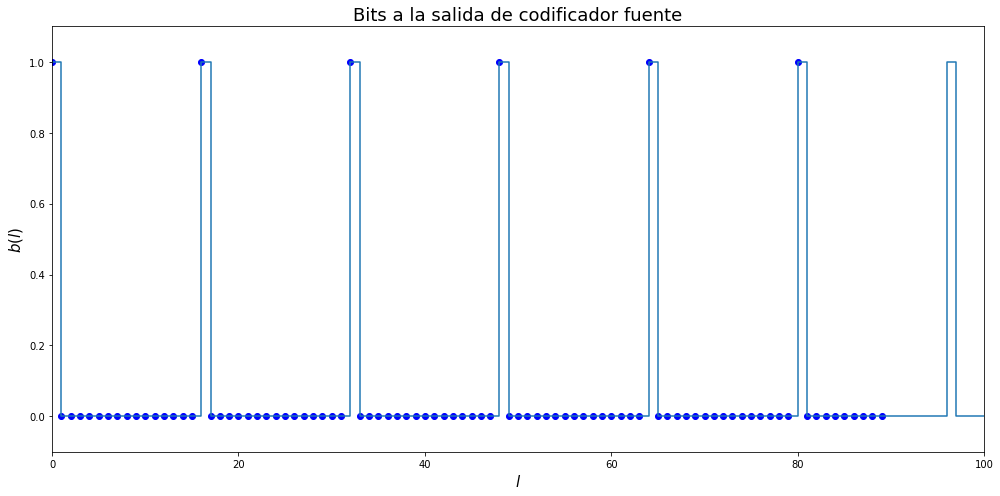

In [5]:
fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(14, 7))

# La onda de bits e la salida del codificador de fuente
plt.title('Bits a la salida de codificador fuente')
plt.axis((0,100,-0.1,1.1))
ax.plot(bkT[0:90], 'bo') 
puntos=np.arange(0,1965888,1)     #posicion eje x para escalon
plt.step(puntos,bkT, where='post')
ax.set_ylabel('$b(l)$')
ax.set_xlabel('$l$ ')
ax.title.set_size(18)
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
fig.tight_layout()
plt.show()

In [6]:
bfT = bkT
# Asumiendo un canal ideal:
bfR = bfT

# Decodificación

bkR = bfR
# Para convertir bits a símbolos:
cant_simb = 2**16 # Cantidad de símbolos
simbolosR = np.zeros(len(vT)) # Arreglo para los símbolos

# Pasar de binario a decimal
for i in range(0,len(simbolosR)):
    for j in range(0,16):
        simbolosR[i] += bkR[16*i+j]*(2**(16-j-1)) 
    
simbolosR = simbolosR.astype(int) # Símbolos

# Convertir de símbolos a muestras
vR = np.zeros(len(simbolosR)) # vector para las muestras recuperadas

for i in range(0,len(vR)):
    vR[i] = -(2**16)/2 + simbolosR[i]
    
vR = vR.astype(int)

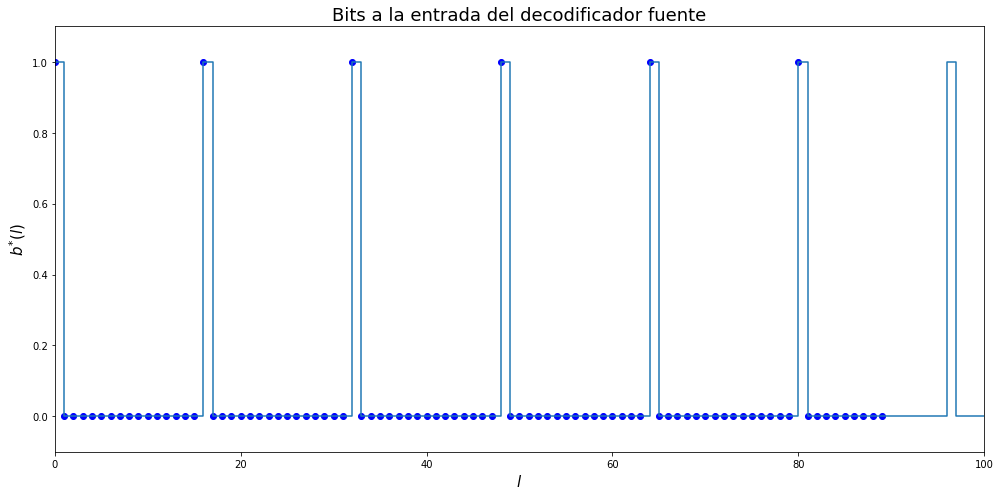

In [7]:
fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(14, 7))

# La onda de bits en la entrada del decodificador
plt.title('Bits a la entrada del decodificador fuente')
plt.axis((0,100,-0.1,1.1))
ax.plot(bkR[0:90], 'bo') 
puntos=np.arange(0,1965888,1)     #posicion eje x para escalon
plt.step(puntos,bkR, where='post')
ax.set_ylabel('$b^{*}(l)$')
ax.set_xlabel('$l$ ')
ax.title.set_size(18)
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
fig.tight_layout()
plt.show()

In [8]:
print(f"Frecuencia de muestreo: {fs} Hz")
print(f"Numero de canales de senal = {len(sonido.shape)}")
print(f"Cantidad de muestras del canal: {sonido.shape[0]}")
print(f"Duracion del audio = {longitud_del_audio_en_sec}s")
print(f"{bits}-Los niveles de cuantizacion van de -{2**(bits - 1)} a {2**(bits - 1) - 1}")
print(f"Valor de amplitutud maximo de la senal de audio: {np.max(vT)}")

Frecuencia de muestreo: 22050 Hz
Numero de canales de senal = 2
Cantidad de muestras del canal: 122868
Duracion del audio = 5.572244897959184s
16-Los niveles de cuantizacion van de -32768 a 32767
Valor de amplitutud maximo de la senal de audio: 9280


##Senal con nivel de cuantizacion original

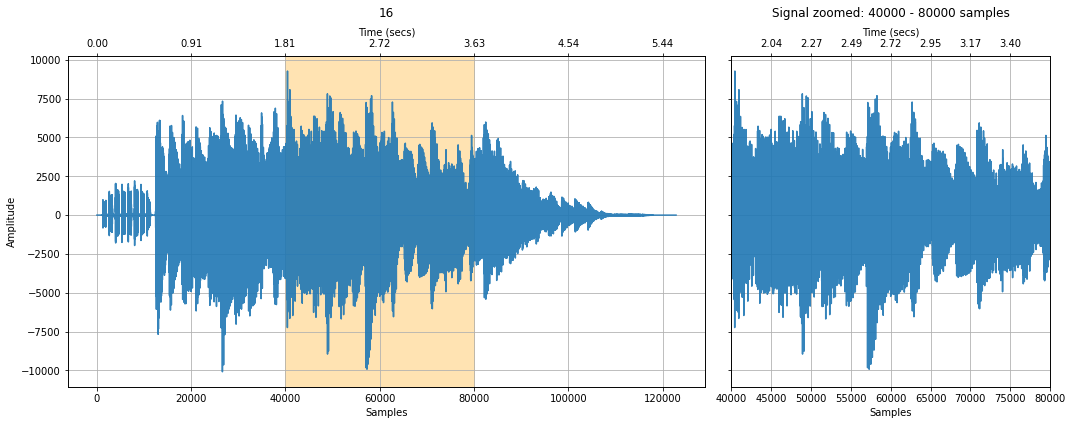

In [9]:
# Señal transmitida
xlim_zoom = (40000, 80000) # zoom de la senal muestreada
makelab.signal.plot_signal(vT, fs, bits, xlim_zoom = xlim_zoom) #plotear vector de bits que muestran los valores cuantizados vs la cantidad de muestras y vs el tiempo
ipd.Audio(vT, rate=fs)

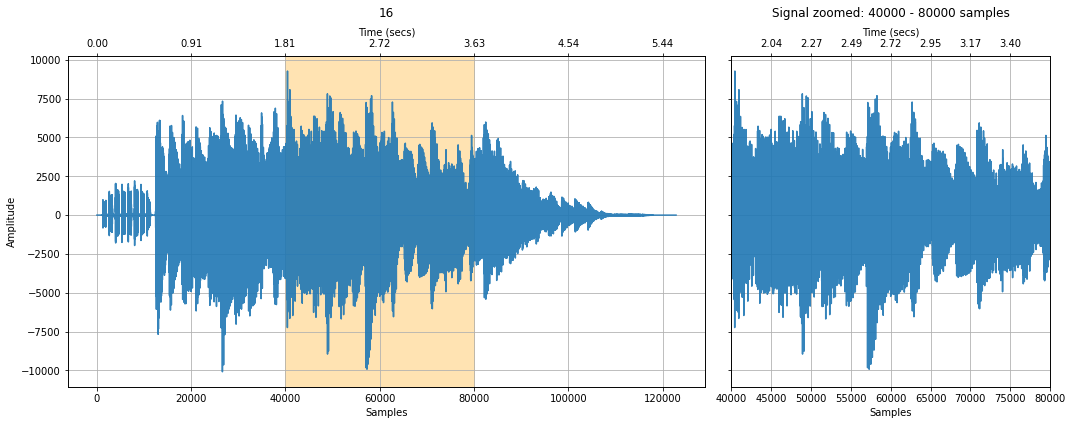

In [10]:
# Señal recuperada
makelab.signal.plot_signal(vR, fs, bits, xlim_zoom = xlim_zoom)
ipd.Audio(vR, rate=fs)

In [11]:
#escribir y guardar archivo .wav
parte = vT[:]
print('archivo de parte[] grabado...')
waves.write('resultado.wav', fs, parte)

archivo de parte[] grabado...
